In [1]:
# Load various imports
import numpy as np
import pandas as pd
import os
import librosa
import ast

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix

from matplotlib import pyplot as plt
import seaborn as sn

from sklearn import metrics

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam

Using TensorFlow backend.


### Função para extrair MFCCs de um ficheiro de áudio:

In [2]:
def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=10)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None 
     
    return mfccs

Extrai 13 listas de 173 valores:<br>data_exp.shape = (13, 173), ou seja 13 coeficientes para cada 1 dos 173 bins<br>axis=0 significa ao longo da coluna

In [3]:
filename = 'US8KS/air_conditioner.wav'
data_exp=extract_features(filename)
data_exp[0] #coeficiente 1 de cada um dos bins

array([ -99.52138371,  -95.63282042, -100.12341741, -100.70122596,
        -99.45521207,  -96.40714169,  -99.933068  ,  -96.44667069,
        -97.50029833,  -95.93855432,  -96.01259157,  -92.02787065,
        -90.19983378,  -97.47124369,  -97.44046654,  -91.1887362 ,
        -88.24488463,  -88.79596921,  -96.71088267,  -99.30292995,
       -102.74057043, -110.05231804, -106.57563549, -107.65112754,
       -109.66976228, -110.53902435, -105.44110964, -105.82342372,
       -100.64986179, -100.30121713, -103.45508264, -101.92058453,
       -104.71623278, -109.79366433, -106.23663077, -105.36616952,
       -106.43210086, -101.86303378, -101.30235647, -108.03104266,
       -109.31594181, -108.01401279, -106.19663018, -103.21077939,
       -103.32591809, -101.82475344,  -95.87184241,  -98.78841907,
       -103.2397737 , -105.82483691, -105.32259361, -107.83412291,
       -108.57408961, -108.11336171, -109.58814405, -106.13161209,
       -105.85176246, -105.04204422, -109.04946703, -109.86780

np.mean faz uma média de um coefficiente presente em todos os bins<br>ou seja, percorre todo o eixo do x (x entre 1 e 173) e faz uma média de todos os valores do coeficiente y (y entre 1 e 13)

In [4]:
filename = 'US8KS/air_conditioner.wav'
data_exp=extract_features(filename)
data_exp[0]
mean=np.mean(data_exp.T, axis=0)
mean

array([-106.46682237,  136.71918919,  -25.21238863,  -12.05361479,
        -36.01345889,    2.04263642,  -20.93445954,    9.67050199,
        -20.30589893,    9.54605096])

In [5]:
# Read the metadata
metadata = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata

,slice_file_name,fsID,start,end,salience,fold,classID,class_name
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [6]:
# # Set the path to the full UrbanSound dataset 
# fulldatasetpath = '/Users/pedro/OneDrive - Universidade do Porto/Tese/UrbanSound8K/audio/'

# # Read the metadata
# metadata = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')

# features = []

# # Iterate through each sound file and extract the features 
# for index, row in metadata.iterrows():
    
#     file_name = os.path.join(os.path.abspath(fulldatasetpath),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    
#     class_label = row["class_name"]
#     data = extract_features(file_name)
    
#     features.append([data, class_label])

# # Convert into a Panda dataframe 
# featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

# print('Finished feature extraction from ', len(featuresdf), ' files')

In [7]:
#featuresdf

In [8]:
# def transform_to_list(row):
#     return row.feature.tolist()
# featuresdf["feature"] = featuresdf.apply(transform_to_list, axis=1)

In [9]:
# featuresdf.to_csv("13MFCCs.csv", sep="|", index=False)

In [10]:
new_featuresdf = pd.read_csv("10MFCCs.csv", sep="|")
new_featuresdf

,feature,class_label
0,"[-215.79300197978586, 71.6661218577675, -131.8...",dog_bark
1,"[-424.68685717404645, 110.56227614968253, -54....",children_playing
2,"[-459.56466281715973, 122.80034862683691, -47....",children_playing
3,"[-414.55377053561494, 102.89690543200295, -36....",children_playing
4,"[-447.39699928170836, 115.09538477641466, -53....",children_playing
...,...,...
8727,"[-399.2257209098363, 136.81901320524457, -51.9...",car_horn
8728,"[-346.7273127859397, 87.4884743538864, -46.265...",car_horn
8729,"[-304.6131609118385, 112.61991286445974, -47.1...",car_horn
8730,"[-344.7142096344138, 126.7581432632123, -56.17...",car_horn


In [11]:
def convert_to_list(row):
    return ast.literal_eval(row.feature)
new_featuresdf['feature'] = new_featuresdf.apply(convert_to_list, axis=1)

In [12]:
new_featuresdf

,feature,class_label
0,"[-215.79300197978586, 71.6661218577675, -131.8...",dog_bark
1,"[-424.68685717404645, 110.56227614968253, -54....",children_playing
2,"[-459.56466281715973, 122.80034862683691, -47....",children_playing
3,"[-414.55377053561494, 102.89690543200295, -36....",children_playing
4,"[-447.39699928170836, 115.09538477641466, -53....",children_playing
...,...,...
8727,"[-399.2257209098363, 136.81901320524457, -51.9...",car_horn
8728,"[-346.7273127859397, 87.4884743538864, -46.265...",car_horn
8729,"[-304.6131609118385, 112.61991286445974, -47.1...",car_horn
8730,"[-344.7142096344138, 126.7581432632123, -56.17...",car_horn


In [13]:
new_featuresdf.feature[0]

[-215.79300197978586,
 71.6661218577675,
 -131.8137710605355,
 -52.09133106039041,
 -22.115966541692504,
 -21.764182004937346,
 -11.18374714512825,
 18.91268019506631,
 6.726638568856883,
 14.55689415517604]

In [14]:
# Convert features and corresponding classification labels into numpy arrays
X = np.array(new_featuresdf.feature.tolist())
y = np.array(new_featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) #Transforms class labels into binary vectores with 1 on the respective class

In [15]:
# split the dataset
x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

In [16]:
print(x_train.shape)
x_train

(6985, 10)


array([[ -88.92953108,  117.30896887,  -98.37564672, ...,   30.92312956,
         -17.13334108,   20.05482103],
       [-162.97491759,  135.34387275,  -26.99131247, ...,   -1.75376153,
         -20.16983209,    6.00842327],
       [-262.99781128,  178.10604279, -112.84569232, ...,   47.54503569,
          -0.64291083,    4.41947586],
       ...,
       [-290.99601244,  233.35096427,   -4.672565  , ...,    4.47015114,
           4.32705193,    8.89090815],
       [-201.69655821,   93.59072473,  -80.86042064, ...,   26.43131479,
          -8.06829713,    6.87538979],
       [-271.51473186,  135.73034422,   -9.02778043, ...,   24.21791768,
          -7.36811897,   13.89941399]])

In [17]:
print(x_test.shape)
x_test

(1747, 10)


array([[ -82.12358939,  139.50591598,  -42.43086489, ...,   25.89713885,
          -9.40527728,   21.21042898],
       [ -15.74400541,  124.11995993,  -29.42888126, ...,   16.533573  ,
         -16.97172924,    4.48358393],
       [-123.39365145,   15.18194631,  -50.09332904, ...,   13.51293887,
         -11.38205589,   19.94935211],
       ...,
       [-405.09167417,  155.38215147,   30.87562165, ...,    5.84124805,
           7.53057838,   14.71799657],
       [-169.86908191,   92.62239816,   -4.04844988, ...,   -2.60889861,
         -24.47195986,    1.80282925],
       [-196.62097393,  152.14464786,  -57.457441  , ...,   19.15266183,
         -10.60624149,   24.81415462]])

In [18]:
print(y_train.shape)
y_train

(6985, 10)


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [19]:
print(y_test.shape)
y_test

(1747, 10)


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

# Logistic Regression

Dá para fazer logistic regression com CV já incorporada, pesquisar no sklearn

In [20]:
model = LogisticRegression(multi_class='ovr',max_iter=200)

O seguinte passo basicamente retorna um vetor com os índices das labels de cada sample <br>
np.argmax returnes the indices of the highest values

In [21]:
y_train_one_column = []
for one_hot_array in y_train:
    y_train_one_column.append(str(np.argmax(one_hot_array)))
y_train_one_column = np.array(y_train_one_column)
y_test_one_column = []
for one_hot_array in y_test:
    y_test_one_column.append(str(np.argmax(one_hot_array)))
y_test_one_column = np.array(y_test_one_column)

In [22]:
print(y_train_one_column.shape)
y_train_one_column

(6985,)


array(['8', '9', '8', ..., '0', '8', '8'], dtype='<U1')

In [23]:
print(y_test_one_column.shape)
y_test_one_column

(1747,)


array(['8', '9', '4', ..., '5', '9', '8'], dtype='<U1')

In [24]:
model.fit(x_train, y_train_one_column)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
model.score(x_test, y_test_one_column)

0.4682312535775615

In [26]:
y_predicted = model.predict(x_test)

In [27]:
cm = confusion_matrix(y_test_one_column, y_predicted)
cm

array([[ 62,   0,  21,   4,  14,  30,   0,  42,   3,  27],
       [ 12,  29,   8,   1,   8,   4,   0,   8,   7,   9],
       [  8,   4,  80,  20,  19,  12,   0,   2,  18,  20],
       [ 13,   2,  15, 133,  10,   1,   0,   1,  20,   6],
       [  6,   4,  10,  12, 113,   5,   0,  30,  10,  16],
       [ 42,   0,   2,   5,   7,  69,   0,  43,  15,  10],
       [  1,   0,   5,  32,   8,   0,   0,   4,   1,  21],
       [ 16,   0,   1,   0,  39,  20,   0, 113,  12,   7],
       [ 10,   0,  11,   7,   1,   4,   0,   4, 125,   3],
       [ 24,   6,  30,   8,  19,  27,   0,  15,   7,  94]], dtype=int64)

Text(68.09375, 0.5, 'Truth')

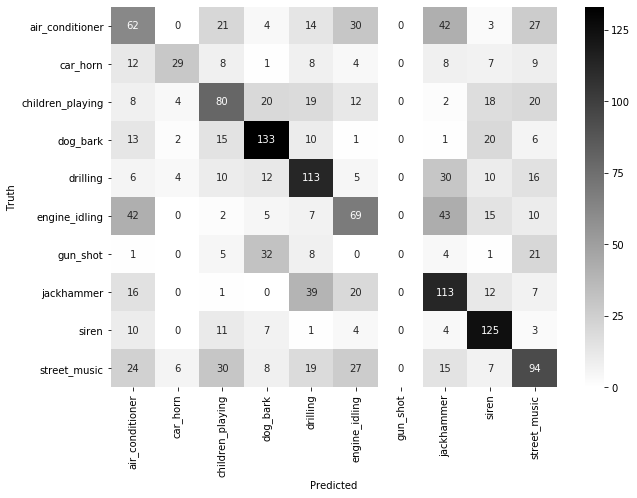

In [28]:
labels = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
       'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren',
       'street_music']
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels, fmt='g', cmap="gray_r")
plt.xlabel('Predicted')
plt.ylabel('Truth')

Pôr normalize='true' é basicamente dizer que se quer obter a precisão.

In [29]:
cm = confusion_matrix(y_test_one_column, y_predicted, normalize='true')*100
cm

array([[30.54187192,  0.        , 10.34482759,  1.97044335,  6.89655172,
        14.77832512,  0.        , 20.68965517,  1.47783251, 13.30049261],
       [13.95348837, 33.72093023,  9.30232558,  1.1627907 ,  9.30232558,
         4.65116279,  0.        ,  9.30232558,  8.13953488, 10.46511628],
       [ 4.3715847 ,  2.18579235, 43.71584699, 10.92896175, 10.38251366,
         6.55737705,  0.        ,  1.09289617,  9.83606557, 10.92896175],
       [ 6.46766169,  0.99502488,  7.46268657, 66.16915423,  4.97512438,
         0.49751244,  0.        ,  0.49751244,  9.95024876,  2.98507463],
       [ 2.91262136,  1.94174757,  4.85436893,  5.82524272, 54.85436893,
         2.42718447,  0.        , 14.5631068 ,  4.85436893,  7.76699029],
       [21.76165803,  0.        ,  1.03626943,  2.59067358,  3.62694301,
        35.75129534,  0.        , 22.27979275,  7.77202073,  5.18134715],
       [ 1.38888889,  0.        ,  6.94444444, 44.44444444, 11.11111111,
         0.        ,  0.        ,  5.55555556

Text(68.09375, 0.5, 'Truth')

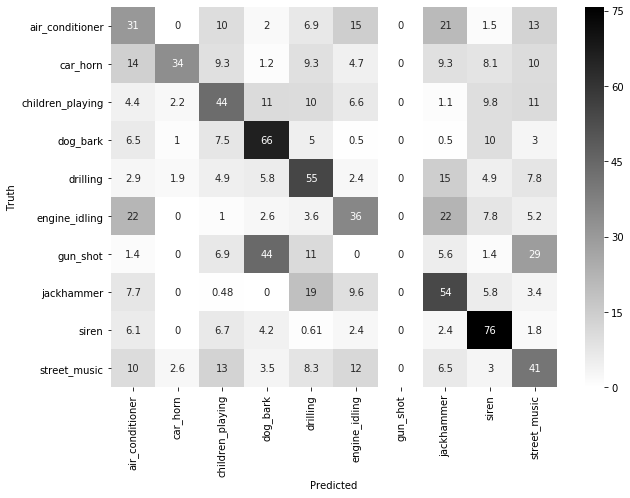

In [30]:
labels = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
       'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren',
       'street_music']
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels, cmap="gray_r")
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Random Forest

* number of decision trees used (n_estimators): 20
* criterion (gini  or entropy): gini
* seed used by the random state generator for randomizing the dataset (random_state): 42

In [31]:
# training a Random Forest classifier
model = RandomForestClassifier(n_estimators=20, random_state=42)
model.fit(x_train, y_train_one_column)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [32]:
model.score(x_test, y_test_one_column)

0.8477389811104751

In [33]:
y_predicted = model.predict(x_test)

In [34]:
cm = confusion_matrix(y_test_one_column, y_predicted)
cm

array([[187,   0,   2,   0,   0,   1,   0,   2,   1,  10],
       [  8,  56,   6,   2,   4,   0,   1,   1,   4,   4],
       [  5,   0, 145,   5,   4,   2,   3,   1,   4,  14],
       [  5,   4,  10, 168,   1,   1,   2,   0,   7,   3],
       [  4,   2,   4,   2, 169,   0,   1,  13,   3,   8],
       [  3,   0,   4,   1,   0, 179,   0,   1,   4,   1],
       [  1,   0,   5,   6,   2,   0,  53,   2,   1,   2],
       [  2,   0,   1,   1,   8,   0,   0, 193,   0,   3],
       [  2,   2,   1,   5,   0,   0,   2,   1, 151,   1],
       [  9,   0,  22,   8,   3,   5,   0,   3,   0, 180]], dtype=int64)

Text(68.09375, 0.5, 'Truth')

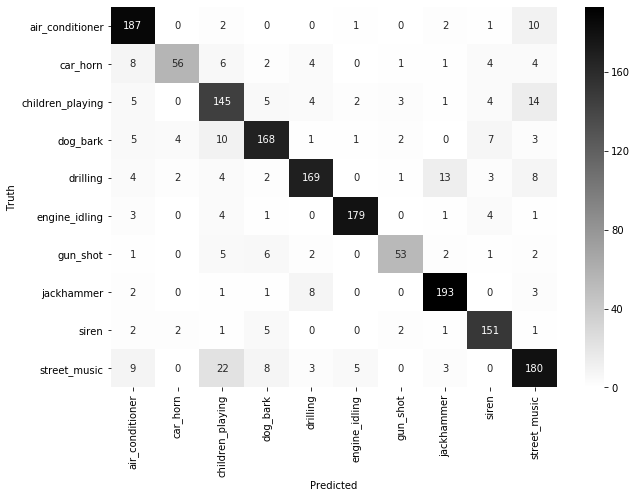

In [35]:
labels = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
       'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren',
       'street_music']
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels, fmt='g', cmap="gray_r")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
cm = confusion_matrix(y_test_one_column, y_predicted, normalize='true')*100
cm

array([[92.1182266 ,  0.        ,  0.98522167,  0.        ,  0.        ,
         0.49261084,  0.        ,  0.98522167,  0.49261084,  4.92610837],
       [ 9.30232558, 65.11627907,  6.97674419,  2.3255814 ,  4.65116279,
         0.        ,  1.1627907 ,  1.1627907 ,  4.65116279,  4.65116279],
       [ 2.73224044,  0.        , 79.23497268,  2.73224044,  2.18579235,
         1.09289617,  1.63934426,  0.54644809,  2.18579235,  7.65027322],
       [ 2.48756219,  1.99004975,  4.97512438, 83.58208955,  0.49751244,
         0.49751244,  0.99502488,  0.        ,  3.48258706,  1.49253731],
       [ 1.94174757,  0.97087379,  1.94174757,  0.97087379, 82.03883495,
         0.        ,  0.48543689,  6.31067961,  1.45631068,  3.88349515],
       [ 1.55440415,  0.        ,  2.07253886,  0.51813472,  0.        ,
        92.74611399,  0.        ,  0.51813472,  2.07253886,  0.51813472],
       [ 1.38888889,  0.        ,  6.94444444,  8.33333333,  2.77777778,
         0.        , 73.61111111,  2.77777778

Text(68.09375, 0.5, 'Truth')

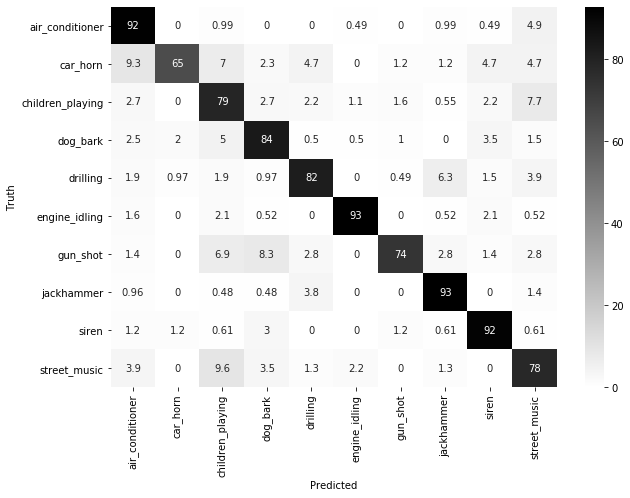

In [37]:
labels = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
       'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren',
       'street_music']
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels, cmap="gray_r")
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Feed-forward Neural Network

In [38]:
num_labels = y_train.shape[1]

N=1

model = Sequential()

model.add(Dense(1024, input_shape=(10,)))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))

for i in range(N-1):
    model.add(Dense(1024))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.fit(x_train, y_train, batch_size=32, epochs=500)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/500





6985/6985 [==============================] - 1s 140us/step - loss: 1.8929 - acc: 0.3512
Epoch 2/500
6985/6985 [==============================] - 1s 72us/step - loss: 1.5504 - acc: 0.4683
Epoch 3/500
6985/6985 [==============================] - 1s 92us/step - loss: 1.4176 - acc: 0.5135
Epoch 4/500
6985/6985 [==============================] - 1s 76us/step - loss: 1.3519 - acc: 0.5383
Epoch 5/500
6985/6985 [==============================] - 1s 73us/step - loss: 1.2837 - acc: 0.5560
Epoch 6/500
6985/6985 [==============================] - 1s 75us/step - loss: 1.2437 - acc: 0.5737
Epoch 7/500
6985/6985 [==============================] - 1s 80us/step - loss: 1.2006 - acc: 0.5821
Epoch 8/500
6985/6985 [==============================] - 1s 73us/step - loss: 1.171

6985/6985 [==============================] - 1s 104us/step - loss: 0.5748 - acc: 0.8016
Epoch 130/500
6985/6985 [==============================] - 0s 70us/step - loss: 0.5720 - acc: 0.8097
Epoch 131/500
6985/6985 [==============================] - 1s 78us/step - loss: 0.5638 - acc: 0.8090
Epoch 132/500
6985/6985 [==============================] - 1s 80us/step - loss: 0.5731 - acc: 0.8017
Epoch 133/500
6985/6985 [==============================] - 1s 102us/step - loss: 0.5536 - acc: 0.8064
Epoch 134/500
6985/6985 [==============================] - 1s 89us/step - loss: 0.5671 - acc: 0.8064
Epoch 135/500
6985/6985 [==============================] - 1s 73us/step - loss: 0.5535 - acc: 0.8087
Epoch 136/500
6985/6985 [==============================] - 1s 75us/step - loss: 0.5714 - acc: 0.7997
Epoch 137/500
6985/6985 [==============================] - 1s 74us/step - loss: 0.5647 - acc: 0.8037
Epoch 138/500
6985/6985 [==============================] - 1s 85us/step - loss: 0.5617 - acc: 0.8062
Ep

6985/6985 [==============================] - 0s 64us/step - loss: 0.4728 - acc: 0.8418
Epoch 292/500
6985/6985 [==============================] - 0s 68us/step - loss: 0.4702 - acc: 0.8394
Epoch 293/500
6985/6985 [==============================] - 0s 69us/step - loss: 0.4669 - acc: 0.8401
Epoch 294/500
6985/6985 [==============================] - 0s 67us/step - loss: 0.4567 - acc: 0.8432
Epoch 295/500
6985/6985 [==============================] - 0s 63us/step - loss: 0.4790 - acc: 0.8344
Epoch 296/500
6985/6985 [==============================] - 0s 71us/step - loss: 0.4825 - acc: 0.8379
Epoch 297/500
6985/6985 [==============================] - 0s 68us/step - loss: 0.4627 - acc: 0.8398
Epoch 298/500
6985/6985 [==============================] - 0s 66us/step - loss: 0.4733 - acc: 0.8378
Epoch 299/500
6985/6985 [==============================] - 1s 77us/step - loss: 0.4645 - acc: 0.8428
Epoch 300/500
6985/6985 [==============================] - 0s 64us/step - loss: 0.4588 - acc: 0.8428
Epoc

Epoch 372/500
6985/6985 [==============================] - 1s 90us/step - loss: 0.4432 - acc: 0.8472
Epoch 373/500
6985/6985 [==============================] - 0s 65us/step - loss: 0.4480 - acc: 0.8435
Epoch 374/500
6985/6985 [==============================] - 0s 71us/step - loss: 0.4400 - acc: 0.8503
Epoch 375/500
6985/6985 [==============================] - 0s 66us/step - loss: 0.4408 - acc: 0.8491
Epoch 376/500
6985/6985 [==============================] - 0s 65us/step - loss: 0.4467 - acc: 0.8465
Epoch 377/500
6985/6985 [==============================] - 0s 66us/step - loss: 0.4143 - acc: 0.8541
Epoch 378/500
6985/6985 [==============================] - 1s 92us/step - loss: 0.4339 - acc: 0.8497
Epoch 379/500
6985/6985 [==============================] - 1s 90us/step - loss: 0.4491 - acc: 0.8474
Epoch 380/500
6985/6985 [==============================] - 0s 68us/step - loss: 0.4382 - acc: 0.8520
Epoch 381/500
6985/6985 [==============================] - 1s 78us/step - loss: 0.4448 - ac

In [39]:
y_predicted = model.predict(x_test)

In [40]:
new_y_predicted=list()
for i in y_predicted:
    maximum = max(i)
    new_list = [int(element==maximum) for element in i]
    new_y_predicted.append(new_list)
y_predicted_one_column = list()
for one_hot_array in new_y_predicted:
    y_predicted_one_column.append(str(np.argmax(one_hot_array)))
y_predicted_one_column = np.array(y_predicted_one_column)

In [41]:
cm = confusion_matrix(y_test_one_column, y_predicted_one_column)
cm

array([[186,   0,   5,   0,   2,   1,   0,   1,   1,   7],
       [  3,  63,   7,   0,   6,   1,   0,   2,   1,   3],
       [  4,   5, 141,   1,   3,   5,   0,   0,   7,  17],
       [  4,   3,   6, 163,   8,   1,   4,   0,   9,   3],
       [  2,   3,   6,   2, 171,   0,   1,   6,   0,  15],
       [  1,   0,   5,   0,   0, 183,   0,   0,   3,   1],
       [  0,   2,   8,   4,   2,   3,  50,   0,   2,   1],
       [  2,   2,   0,   1,  11,   1,   0, 185,   0,   6],
       [  1,   2,   3,   3,   1,   0,   1,   2, 151,   1],
       [  9,   2,  18,   8,   2,   3,   0,   2,   3, 183]], dtype=int64)

Text(68.09375, 0.5, 'Truth')

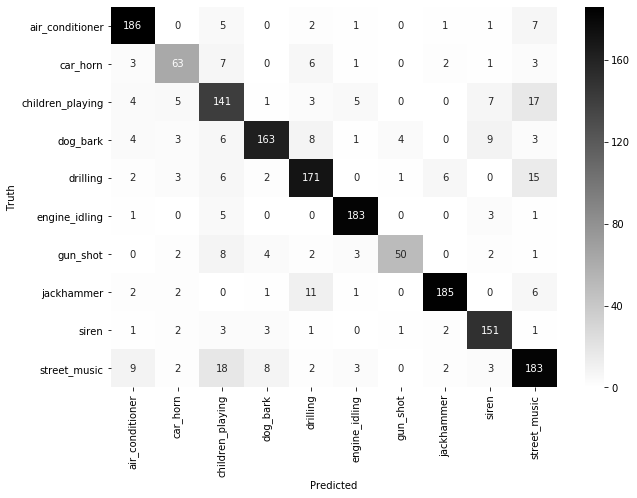

In [42]:
labels = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
       'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren',
       'street_music']
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels, fmt='d',cmap="gray_r")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [43]:
cm = confusion_matrix(y_test_one_column, y_predicted_one_column, normalize='true')*100
cm

array([[91.62561576,  0.        ,  2.46305419,  0.        ,  0.98522167,
         0.49261084,  0.        ,  0.49261084,  0.49261084,  3.44827586],
       [ 3.48837209, 73.25581395,  8.13953488,  0.        ,  6.97674419,
         1.1627907 ,  0.        ,  2.3255814 ,  1.1627907 ,  3.48837209],
       [ 2.18579235,  2.73224044, 77.04918033,  0.54644809,  1.63934426,
         2.73224044,  0.        ,  0.        ,  3.82513661,  9.28961749],
       [ 1.99004975,  1.49253731,  2.98507463, 81.09452736,  3.9800995 ,
         0.49751244,  1.99004975,  0.        ,  4.47761194,  1.49253731],
       [ 0.97087379,  1.45631068,  2.91262136,  0.97087379, 83.00970874,
         0.        ,  0.48543689,  2.91262136,  0.        ,  7.2815534 ],
       [ 0.51813472,  0.        ,  2.59067358,  0.        ,  0.        ,
        94.81865285,  0.        ,  0.        ,  1.55440415,  0.51813472],
       [ 0.        ,  2.77777778, 11.11111111,  5.55555556,  2.77777778,
         4.16666667, 69.44444444,  0.        

Text(68.09375, 0.5, 'Truth')

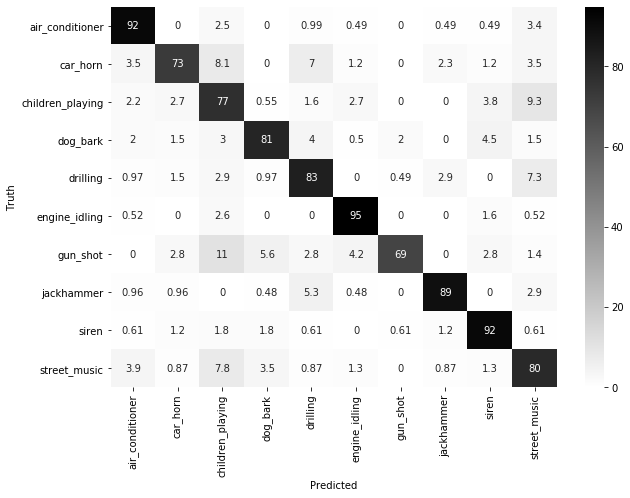

In [44]:
labels = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
       'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren',
       'street_music']
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels, cmap="gray_r")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [45]:
new_y_predicted

[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0,

# k Nearest Neighbors

In [46]:
# training a KNN classifier 
knn = KNeighborsClassifier(n_neighbors = 1).fit(x_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(x_test, y_test) 
print (accuracy) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(x_test)
y_predicted_one_column = list()
for one_hot_array in knn_predictions:
    y_predicted_one_column.append(str(np.argmax(one_hot_array)))
y_predicted_one_column = np.array(y_predicted_one_column)
cm = confusion_matrix(y_test_one_column, y_predicted_one_column)
cm

0.8471665712650257


array([[187,   0,   4,   0,   1,   1,   0,   2,   0,   8],
       [  2,  60,   4,   2,   3,   1,   0,   2,   1,  11],
       [  4,   2, 155,   3,   2,   0,   5,   2,   0,  10],
       [  4,   5,   9, 150,   2,   3,  19,   0,   5,   4],
       [  4,   5,   6,   2, 165,   1,   3,  11,   2,   7],
       [  1,   2,   2,   0,   0, 185,   0,   1,   1,   1],
       [  3,   1,   1,   4,   3,   0,  57,   0,   0,   3],
       [  1,   1,   3,   0,   6,   3,   0, 190,   0,   4],
       [  0,   0,   5,   4,   0,   1,   1,   1, 152,   1],
       [  8,   3,  15,   6,   4,   7,   5,   3,   0, 179]], dtype=int64)

Text(68.09375, 0.5, 'Truth')

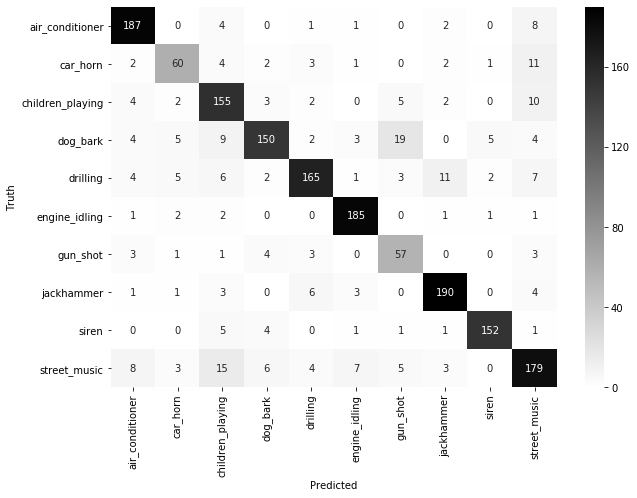

In [47]:
labels = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
       'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren',
       'street_music']
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels, fmt='d',cmap="gray_r")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [48]:
cm = confusion_matrix(y_test_one_column, y_predicted_one_column, normalize='true')*100
cm

array([[92.1182266 ,  0.        ,  1.97044335,  0.        ,  0.49261084,
         0.49261084,  0.        ,  0.98522167,  0.        ,  3.9408867 ],
       [ 2.3255814 , 69.76744186,  4.65116279,  2.3255814 ,  3.48837209,
         1.1627907 ,  0.        ,  2.3255814 ,  1.1627907 , 12.79069767],
       [ 2.18579235,  1.09289617, 84.69945355,  1.63934426,  1.09289617,
         0.        ,  2.73224044,  1.09289617,  0.        ,  5.46448087],
       [ 1.99004975,  2.48756219,  4.47761194, 74.62686567,  0.99502488,
         1.49253731,  9.45273632,  0.        ,  2.48756219,  1.99004975],
       [ 1.94174757,  2.42718447,  2.91262136,  0.97087379, 80.09708738,
         0.48543689,  1.45631068,  5.33980583,  0.97087379,  3.39805825],
       [ 0.51813472,  1.03626943,  1.03626943,  0.        ,  0.        ,
        95.85492228,  0.        ,  0.51813472,  0.51813472,  0.51813472],
       [ 4.16666667,  1.38888889,  1.38888889,  5.55555556,  4.16666667,
         0.        , 79.16666667,  0.        

Text(68.09375, 0.5, 'Truth')

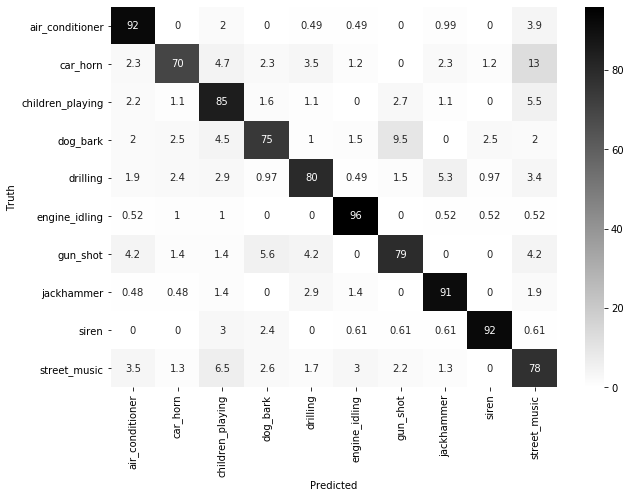

In [49]:
labels = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
       'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren',
       'street_music']
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels, cmap="gray_r")
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Support Vector Machine

In [50]:
# training a linear SVM classifier 
svm_model_linear = SVC(C = 1).fit(x_train, y_train_one_column) 
svm_predictions = svm_model_linear.predict(x_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(x_test, y_test_one_column) 
print (accuracy) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test_one_column, svm_predictions)
print(cm)

0.5518030910131654
[[109   0  17   0  11   4   0  31   4  27]
 [ 10  25  11   2   5   2   0  18   2  11]
 [ 11   2 109   5  12   9   0   3  10  22]
 [  8   2  20 130  10   4   0   0  12  15]
 [  8   4  11   5 104   2   0  45  11  16]
 [ 38   0  18   6   3  85   0  30   1  12]
 [  0   0   4  31   9   0  21   2   2   3]
 [ 24   0   2   0  26   0   0 151   0   5]
 [ 13   1  11   7   1   4   0   5 122   1]
 [ 31   1  37   5   6   9   0  27   6 108]]


Text(68.09375, 0.5, 'Truth')

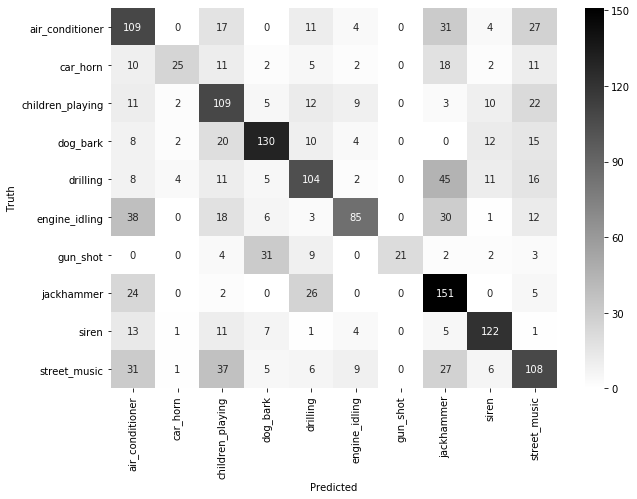

In [51]:
labels = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
       'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren',
       'street_music']
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels, fmt='d',cmap="gray_r")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [52]:
cm = confusion_matrix(y_test_one_column, svm_predictions, normalize='true')*100
cm

array([[53.69458128,  0.        ,  8.37438424,  0.        ,  5.41871921,
         1.97044335,  0.        , 15.27093596,  1.97044335, 13.30049261],
       [11.62790698, 29.06976744, 12.79069767,  2.3255814 ,  5.81395349,
         2.3255814 ,  0.        , 20.93023256,  2.3255814 , 12.79069767],
       [ 6.01092896,  1.09289617, 59.56284153,  2.73224044,  6.55737705,
         4.91803279,  0.        ,  1.63934426,  5.46448087, 12.02185792],
       [ 3.9800995 ,  0.99502488,  9.95024876, 64.67661692,  4.97512438,
         1.99004975,  0.        ,  0.        ,  5.97014925,  7.46268657],
       [ 3.88349515,  1.94174757,  5.33980583,  2.42718447, 50.48543689,
         0.97087379,  0.        , 21.84466019,  5.33980583,  7.76699029],
       [19.68911917,  0.        ,  9.32642487,  3.10880829,  1.55440415,
        44.04145078,  0.        , 15.54404145,  0.51813472,  6.21761658],
       [ 0.        ,  0.        ,  5.55555556, 43.05555556, 12.5       ,
         0.        , 29.16666667,  2.77777778

Text(68.09375, 0.5, 'Truth')

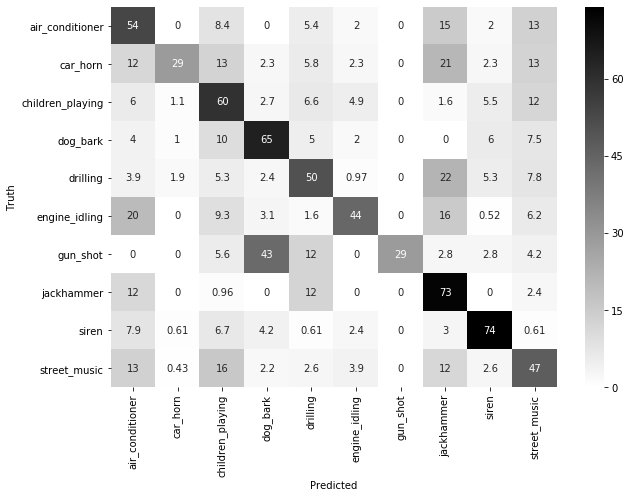

In [53]:
labels = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
       'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren',
       'street_music']
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels, cmap="gray_r")
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Guardar modelos treinados

In [54]:
import joblib

joblib.dump(knn, 'knnmodel.pkl')

['knnmodel.pkl']

In [55]:
loadedknn=joblib.load('knnmodel.pkl')

In [56]:
loadedknnpredictions=loadedknn.predict(x_test)

In [57]:
knn_predictions

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [58]:
loadedknnpredictions-knn_predictions

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [59]:
np.max(loadedknnpredictions-knn_predictions)

0.0